# Data Analysis

### General Information of Dataset

In [1]:
import pandas as pd

# ⚠️ please put data training file in data/ folder first
df = df = pd.read_csv("data/training_data_ht2025.csv")
print('data shape: ', df.shape)
print(df.info())  

data shape:  (1600, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snow            1600 non-null   int64  
 11  snowdepth       1600 non-null   float64
 12  windspeed       1600 non-null   float64
 13  cloudcover      1600 non-null   float64
 14  visibility      1600 non-null   float64
 15  increase_stock  1600 non-null   object 
dtypes: float64(8), int64(7), object(1)
memory usage: 200.1

### Which are the numerical features and which are the categorical features?

In [2]:
print('all features:', list(df.columns))
print('categorical features: ', df.select_dtypes(include=['object']).columns.tolist())
print('numerical features: ', df.select_dtypes(include=['number']).columns.tolist())

all features: ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth', 'windspeed', 'cloudcover', 'visibility', 'increase_stock']
categorical features:  ['increase_stock']
numerical features:  ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']


### Is there a greater trend to need an increase in the availability of bicycles? 

Study the above question from various perspectives:

• Can any trend be seen comparing different hours, weeks, and months?

• Is there any difference between weekdays and holidays?

• Is there any trend depending on the weather? Rainy days, snowy days, etc

=== DATA CHECK ===
Unique values in increase_stock: ['low_bike_demand' 'high_bike_demand']
Data type of increase_stock: object
Conversion: 'low_bike_demand' -> 0, other values -> 1
New increase rate: 18.00%
Total records: 1600

=== TIME-BASED TRENDS ===


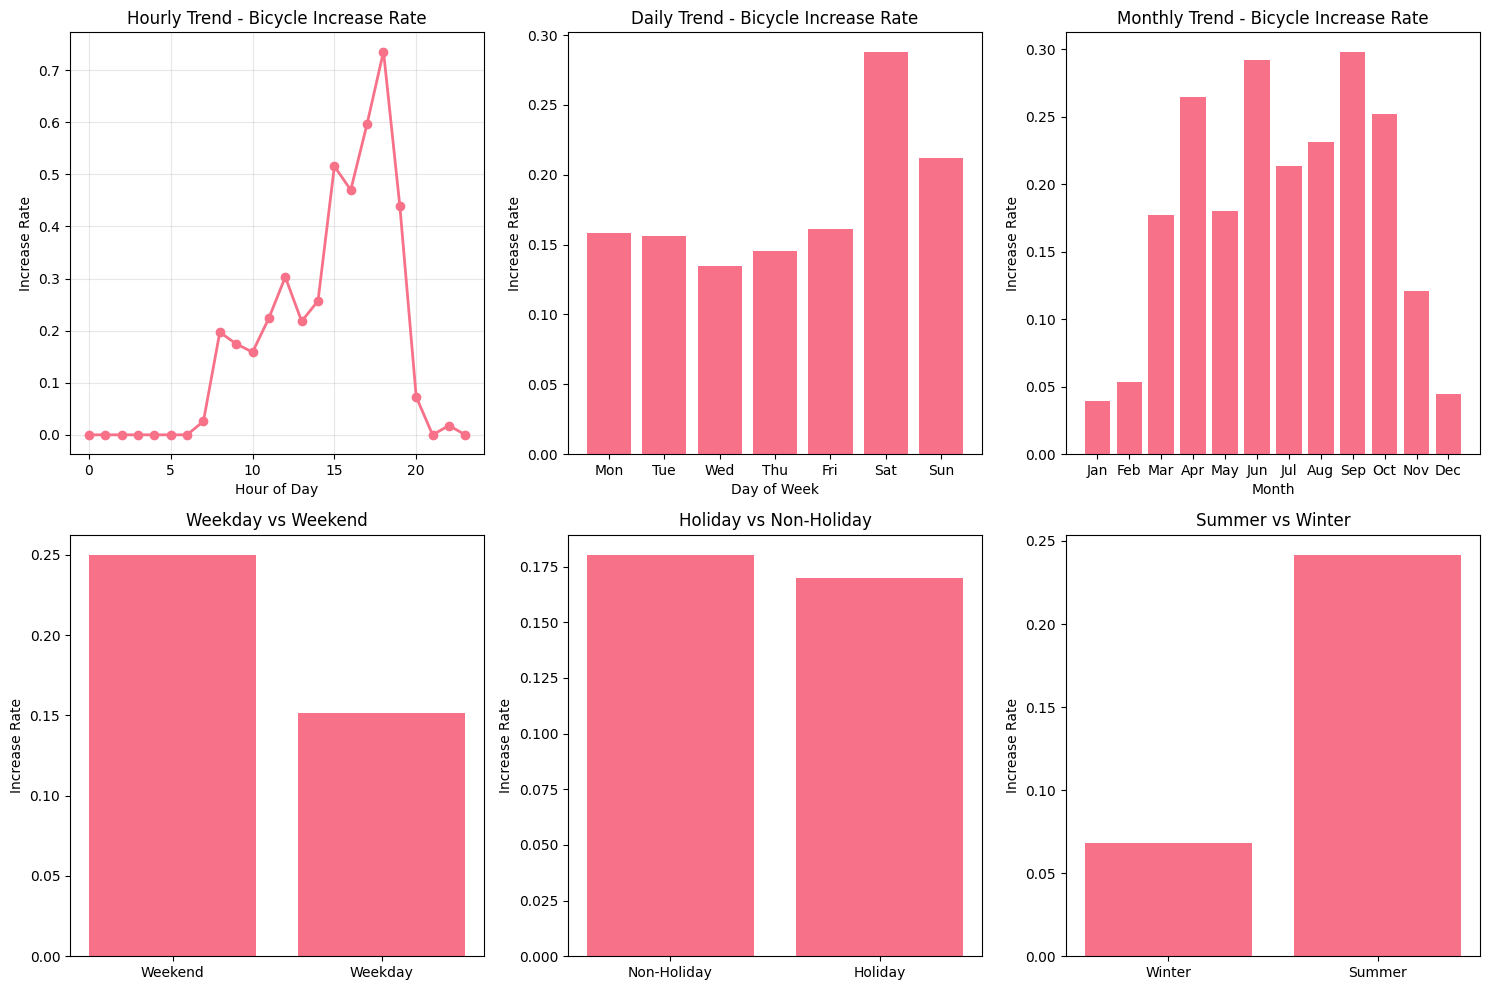


TIME-BASED INSIGHTS:
Peak hour: 18:00 (73.58% increase rate)
Best day: Sat (28.76% increase rate)
Best month: Sep (29.77% increase rate)
Weekday rate: 15.14% vs Weekend rate: 25.00%
Holiday rate: 16.98% vs Non-holiday: 18.03%
Summer rate: 24.17% vs Winter: 6.84%

=== WEATHER-BASED TRENDS ===


/home/dinkey/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/dinkey/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


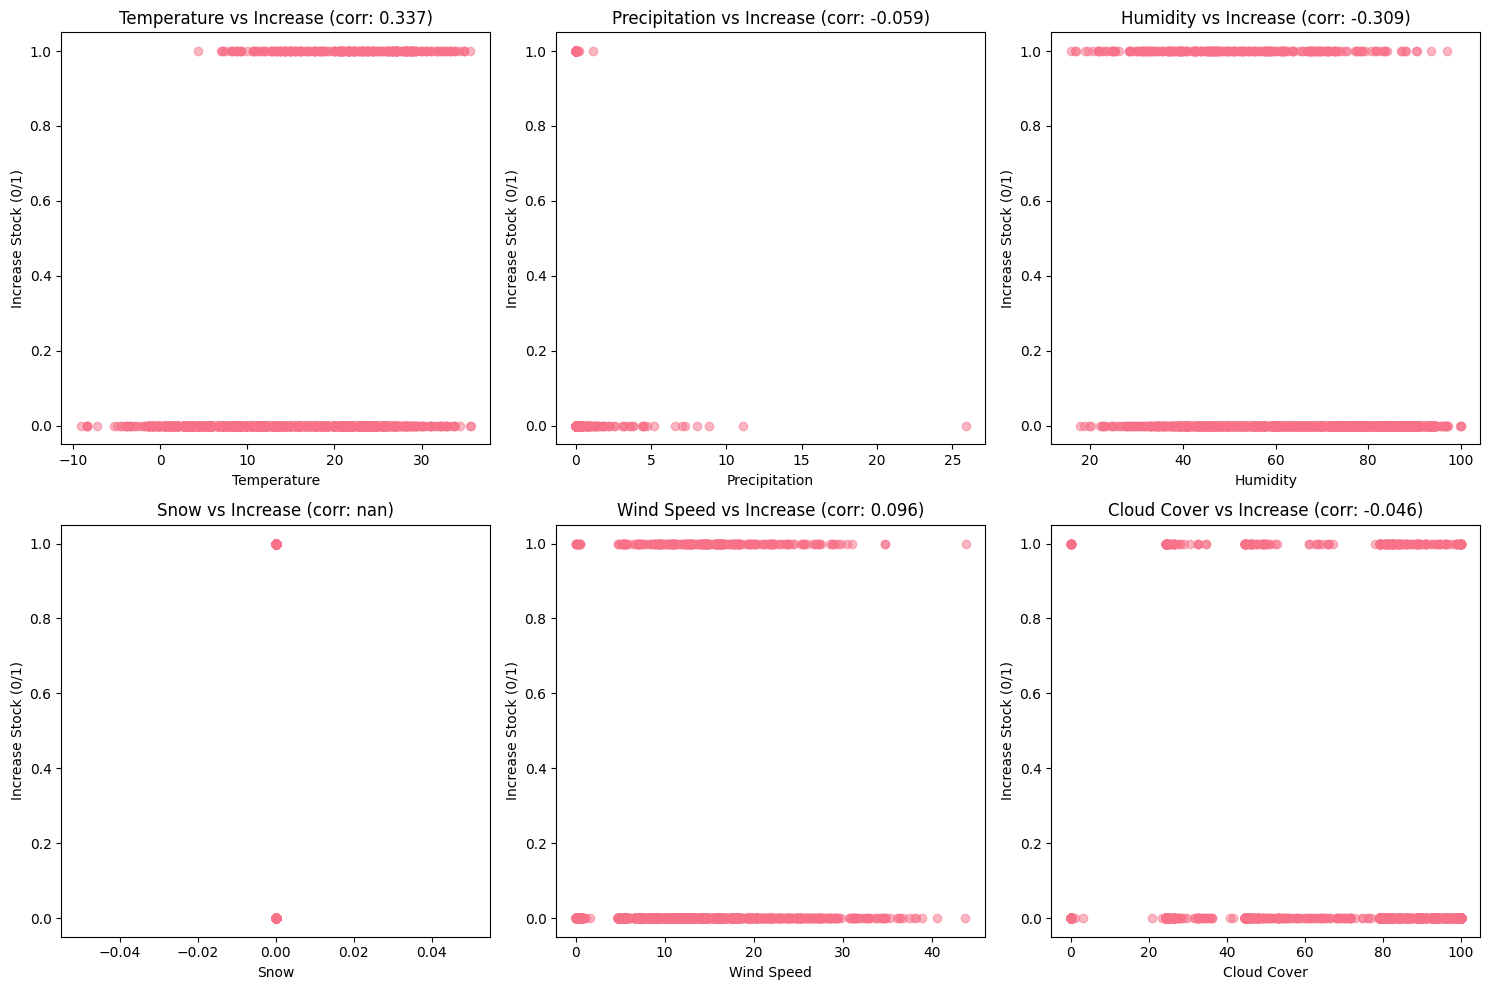


WEATHER CORRELATIONS:
temp        : +0.337
dew         : +0.133
humidity    : -0.309
precip      : -0.059
snow        : +nan
snowdepth   : -0.048
windspeed   : +0.096
cloudcover  : -0.046
visibility  : +0.113

=== EXTREME WEATHER ANALYSIS ===
Rainy days increase rate: 5.16% (155 records)
Non-rainy days increase rate: 19.38% (1445 records)
Optimal temperature range for high demand: 16.3°C to 27.1°C

=== COMBINED INSIGHTS ===
Best conditions (summer weekday, no rain/snow): 22.10% increase rate
Worst conditions (winter weekend, with rain/snow): 8.33% increase rate

OVERALL: 18.00% of time requires stock increase
Total records analyzed: 1600


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

# First, let's check what's actually in your increase_stock column
print("=== DATA CHECK ===")
print("Unique values in increase_stock:", df['increase_stock'].unique())
print("Data type of increase_stock:", df['increase_stock'].dtype)

# Convert increase_stock to numerical (1 for increase, 0 for no increase)
# Assuming 'low_bike_demand' means no increase needed, and other values might indicate increase
df['increase_stock_numeric'] = (df['increase_stock'] != 'low_bike_demand').astype(int)

print(f"Conversion: 'low_bike_demand' -> 0, other values -> 1")
print(f"New increase rate: {df['increase_stock_numeric'].mean():.2%}")
print(f"Total records: {len(df)}")
print()

# 1. TIME-BASED TRENDS ANALYSIS
print("=== TIME-BASED TRENDS ===")

plt.figure(figsize=(15, 10))

# Hourly trend
plt.subplot(2, 3, 1)
hourly_trend = df.groupby('hour_of_day')['increase_stock_numeric'].mean()
plt.plot(hourly_trend.index, hourly_trend.values, marker='o', linewidth=2)
plt.title('Hourly Trend - Bicycle Increase Rate')
plt.xlabel('Hour of Day')
plt.ylabel('Increase Rate')
plt.grid(True, alpha=0.3)

# Daily trend
plt.subplot(2, 3, 2)
daily_trend = df.groupby('day_of_week')['increase_stock_numeric'].mean()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.bar(daily_trend.index, daily_trend.values)
plt.title('Daily Trend - Bicycle Increase Rate')
plt.xlabel('Day of Week')
plt.ylabel('Increase Rate')
plt.xticks(daily_trend.index, days)

# Monthly trend
plt.subplot(2, 3, 3)
monthly_trend = df.groupby('month')['increase_stock_numeric'].mean()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(monthly_trend.index, monthly_trend.values)
plt.title('Monthly Trend - Bicycle Increase Rate')
plt.xlabel('Month')
plt.ylabel('Increase Rate')
plt.xticks(monthly_trend.index, months)

# Weekday vs Weekend
plt.subplot(2, 3, 4)
weekday_trend = df.groupby('weekday')['increase_stock_numeric'].mean()
plt.bar(['Weekend', 'Weekday'], weekday_trend.values)
plt.title('Weekday vs Weekend')
plt.ylabel('Increase Rate')

# Holiday analysis
plt.subplot(2, 3, 5)
holiday_trend = df.groupby('holiday')['increase_stock_numeric'].mean()
plt.bar(['Non-Holiday', 'Holiday'], holiday_trend.values)
plt.title('Holiday vs Non-Holiday')
plt.ylabel('Increase Rate')

# Summer time analysis
plt.subplot(2, 3, 6)
summer_trend = df.groupby('summertime')['increase_stock_numeric'].mean()
plt.bar(['Winter', 'Summer'], summer_trend.values)
plt.title('Summer vs Winter')
plt.ylabel('Increase Rate')

plt.tight_layout()
plt.show()

# Print time-based insights
print(f"\nTIME-BASED INSIGHTS:")
print(f"Peak hour: {hourly_trend.idxmax():02d}:00 ({hourly_trend.max():.2%} increase rate)")
print(f"Best day: {days[daily_trend.idxmax()]} ({daily_trend.max():.2%} increase rate)")
print(f"Best month: {months[monthly_trend.idxmax()-1]} ({monthly_trend.max():.2%} increase rate)")
print(f"Weekday rate: {weekday_trend[1]:.2%} vs Weekend rate: {weekday_trend[0]:.2%}")
print(f"Holiday rate: {holiday_trend[1]:.2%} vs Non-holiday: {holiday_trend[0]:.2%}")
print(f"Summer rate: {summer_trend[1]:.2%} vs Winter: {summer_trend[0]:.2%}")

# 2. WEATHER-BASED TRENDS
print("\n=== WEATHER-BASED TRENDS ===")

plt.figure(figsize=(15, 10))

# Temperature analysis
plt.subplot(2, 3, 1)
temp_corr = df['temp'].corr(df['increase_stock_numeric'])
plt.scatter(df['temp'], df['increase_stock_numeric'], alpha=0.5)
plt.title(f'Temperature vs Increase (corr: {temp_corr:.3f})')
plt.xlabel('Temperature')
plt.ylabel('Increase Stock (0/1)')

# Precipitation analysis
plt.subplot(2, 3, 2)
precip_corr = df['precip'].corr(df['increase_stock_numeric'])
plt.scatter(df['precip'], df['increase_stock_numeric'], alpha=0.5)
plt.title(f'Precipitation vs Increase (corr: {precip_corr:.3f})')
plt.xlabel('Precipitation')
plt.ylabel('Increase Stock (0/1)')

# Humidity analysis
plt.subplot(2, 3, 3)
humidity_corr = df['humidity'].corr(df['increase_stock_numeric'])
plt.scatter(df['humidity'], df['increase_stock_numeric'], alpha=0.5)
plt.title(f'Humidity vs Increase (corr: {humidity_corr:.3f})')
plt.xlabel('Humidity')
plt.ylabel('Increase Stock (0/1)')

# Snow analysis
plt.subplot(2, 3, 4)
snow_corr = df['snow'].corr(df['increase_stock_numeric'])
plt.scatter(df['snow'], df['increase_stock_numeric'], alpha=0.5)
plt.title(f'Snow vs Increase (corr: {snow_corr:.3f})')
plt.xlabel('Snow')
plt.ylabel('Increase Stock (0/1)')

# Wind speed analysis
plt.subplot(2, 3, 5)
wind_corr = df['windspeed'].corr(df['increase_stock_numeric'])
plt.scatter(df['windspeed'], df['increase_stock_numeric'], alpha=0.5)
plt.title(f'Wind Speed vs Increase (corr: {wind_corr:.3f})')
plt.xlabel('Wind Speed')
plt.ylabel('Increase Stock (0/1)')

# Cloud cover analysis
plt.subplot(2, 3, 6)
cloud_corr = df['cloudcover'].corr(df['increase_stock_numeric'])
plt.scatter(df['cloudcover'], df['increase_stock_numeric'], alpha=0.5)
plt.title(f'Cloud Cover vs Increase (corr: {cloud_corr:.3f})')
plt.xlabel('Cloud Cover')
plt.ylabel('Increase Stock (0/1)')

plt.tight_layout()
plt.show()

# Weather conditions summary
print(f"\nWEATHER CORRELATIONS:")
weather_features = ['temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']
for feature in weather_features:
    corr = df[feature].corr(df['increase_stock_numeric'])
    print(f"{feature:12}: {corr:+.3f}")

# 3. EXTREME WEATHER ANALYSIS
print("\n=== EXTREME WEATHER ANALYSIS ===")

# Rainy vs Non-rainy days
rainy_days = df[df['precip'] > 0]
non_rainy_days = df[df['precip'] == 0]
print(f"Rainy days increase rate: {rainy_days['increase_stock_numeric'].mean():.2%} ({len(rainy_days)} records)")
print(f"Non-rainy days increase rate: {non_rainy_days['increase_stock_numeric'].mean():.2%} ({len(non_rainy_days)} records)")

# Snowy vs Non-snowy days
snowy_days = df[df['snow'] > 0]
non_snowy_days = df[df['snow'] == 0]
if len(snowy_days) > 0:
    print(f"Snowy days increase rate: {snowy_days['increase_stock_numeric'].mean():.2%} ({len(snowy_days)} records)")
    print(f"Non-snowy days increase rate: {non_snowy_days['increase_stock_numeric'].mean():.2%} ({len(non_snowy_days)} records)")

# Optimal temperature range (top 25% of increase rates)
high_demand = df[df['increase_stock_numeric'] == 1]
if len(high_demand) > 0:
    optimal_temp_range = (high_demand['temp'].quantile(0.25), high_demand['temp'].quantile(0.75))
    print(f"Optimal temperature range for high demand: {optimal_temp_range[0]:.1f}°C to {optimal_temp_range[1]:.1f}°C")

# 4. COMBINED ANALYSIS
print("\n=== COMBINED INSIGHTS ===")

# Best overall conditions
best_conditions = df[
    (df['weekday'] == 1) &
    (df['summertime'] == 1) &
    (df['precip'] == 0) &
    (df['snow'] == 0)
]
if len(best_conditions) > 0:
    best_rate = best_conditions['increase_stock_numeric'].mean()
    print(f"Best conditions (summer weekday, no rain/snow): {best_rate:.2%} increase rate")

# Worst overall conditions
worst_conditions = df[
    (df['weekday'] == 0) &
    (df['summertime'] == 0) &
    ((df['precip'] > 0) | (df['snow'] > 0))
]
if len(worst_conditions) > 0:
    worst_rate = worst_conditions['increase_stock_numeric'].mean()
    print(f"Worst conditions (winter weekend, with rain/snow): {worst_rate:.2%} increase rate")

# Overall statistics
total_increase_rate = df['increase_stock_numeric'].mean()
print(f"\nOVERALL: {total_increase_rate:.2%} of time requires stock increase")
print(f"Total records analyzed: {len(df)}")

=== BASIC DATA INFO ===
Dataset shape: (1600, 17)

Data types:
hour_of_day                 int64
day_of_week                 int64
month                       int64
holiday                     int64
weekday                     int64
summertime                  int64
temp                      float64
dew                       float64
humidity                  float64
precip                    float64
snow                        int64
snowdepth                 float64
windspeed                 float64
cloudcover                float64
visibility                float64
increase_stock             object
increase_stock_numeric      int64
dtype: object

Missing values: none at all

Number of duplicate rows: none at all


=== NUMERICAL FEATURES SUMMARY ===
       hour_of_day  day_of_week        month      holiday      weekday  \
count   1600.00000  1600.000000  1600.000000  1600.000000  1600.000000   
mean      11.37125     3.022500     6.468750     0.033125     0.710000   
std        6.94837

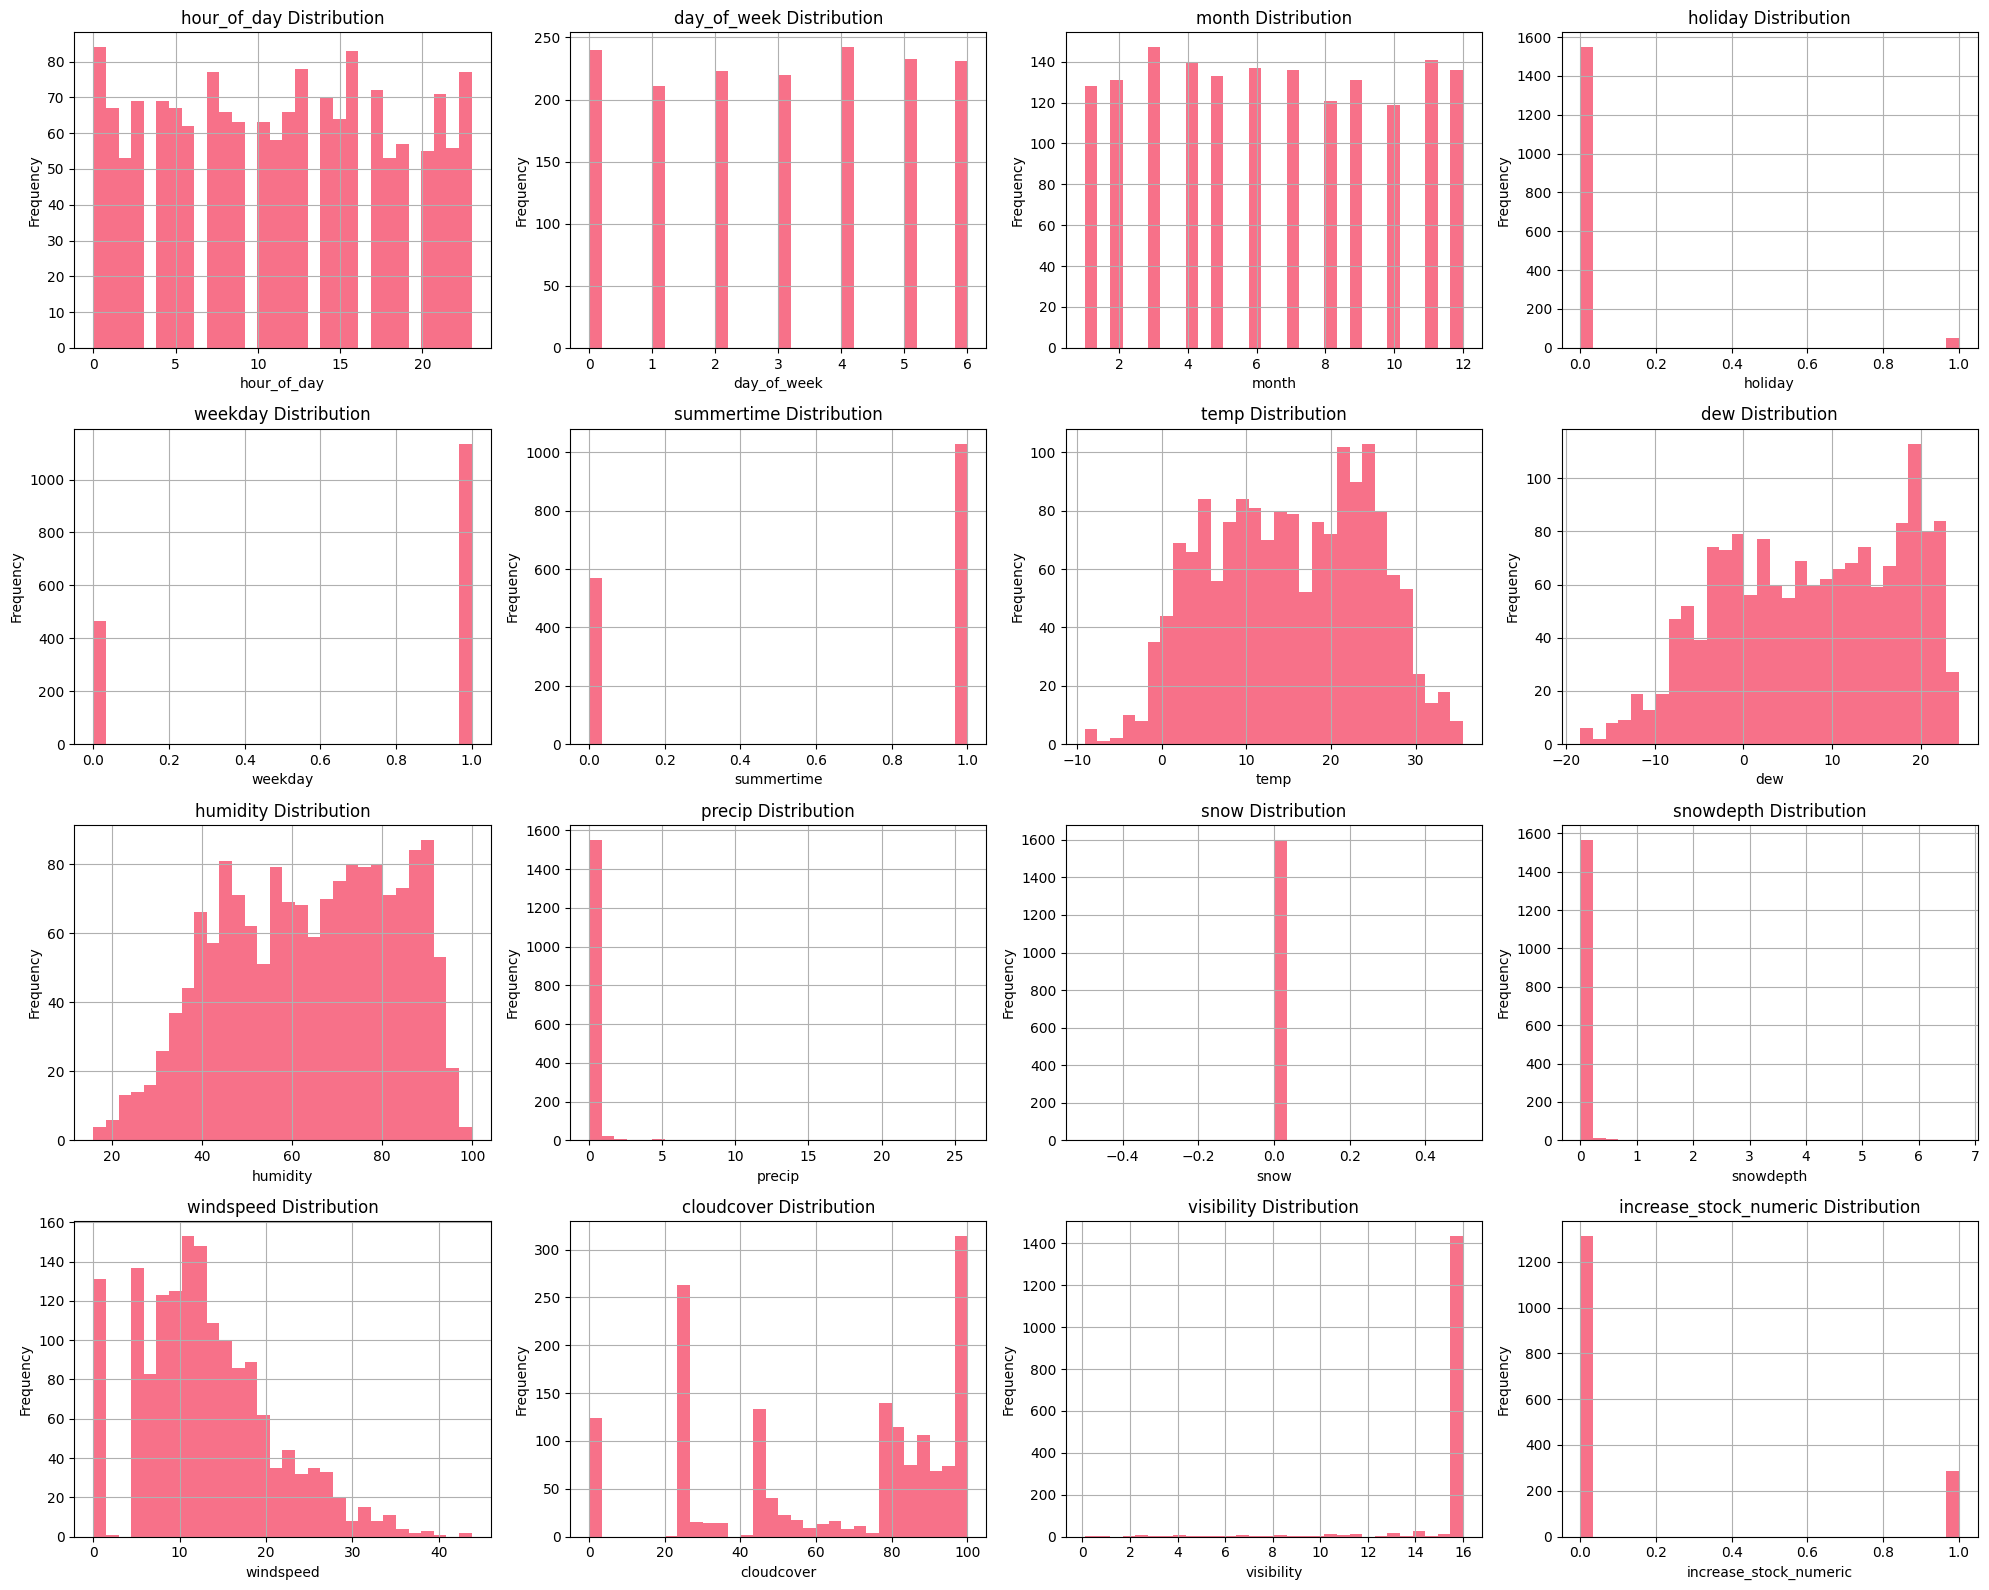

=== CORRELATION ANALYSIS ===


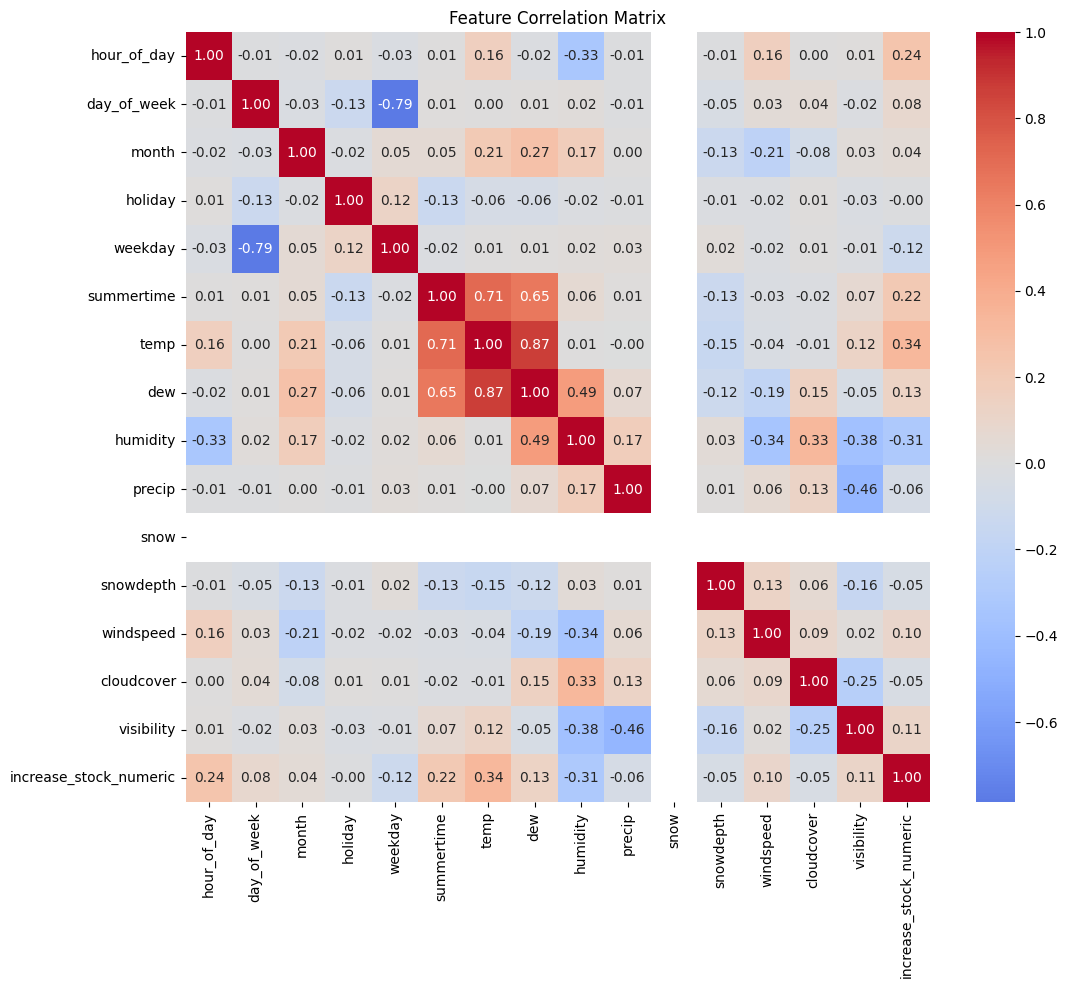


High correlations (|r| > 0.8):
  temp vs dew: 0.872
=== FEATURE-TARGET RELATIONSHIPS ===


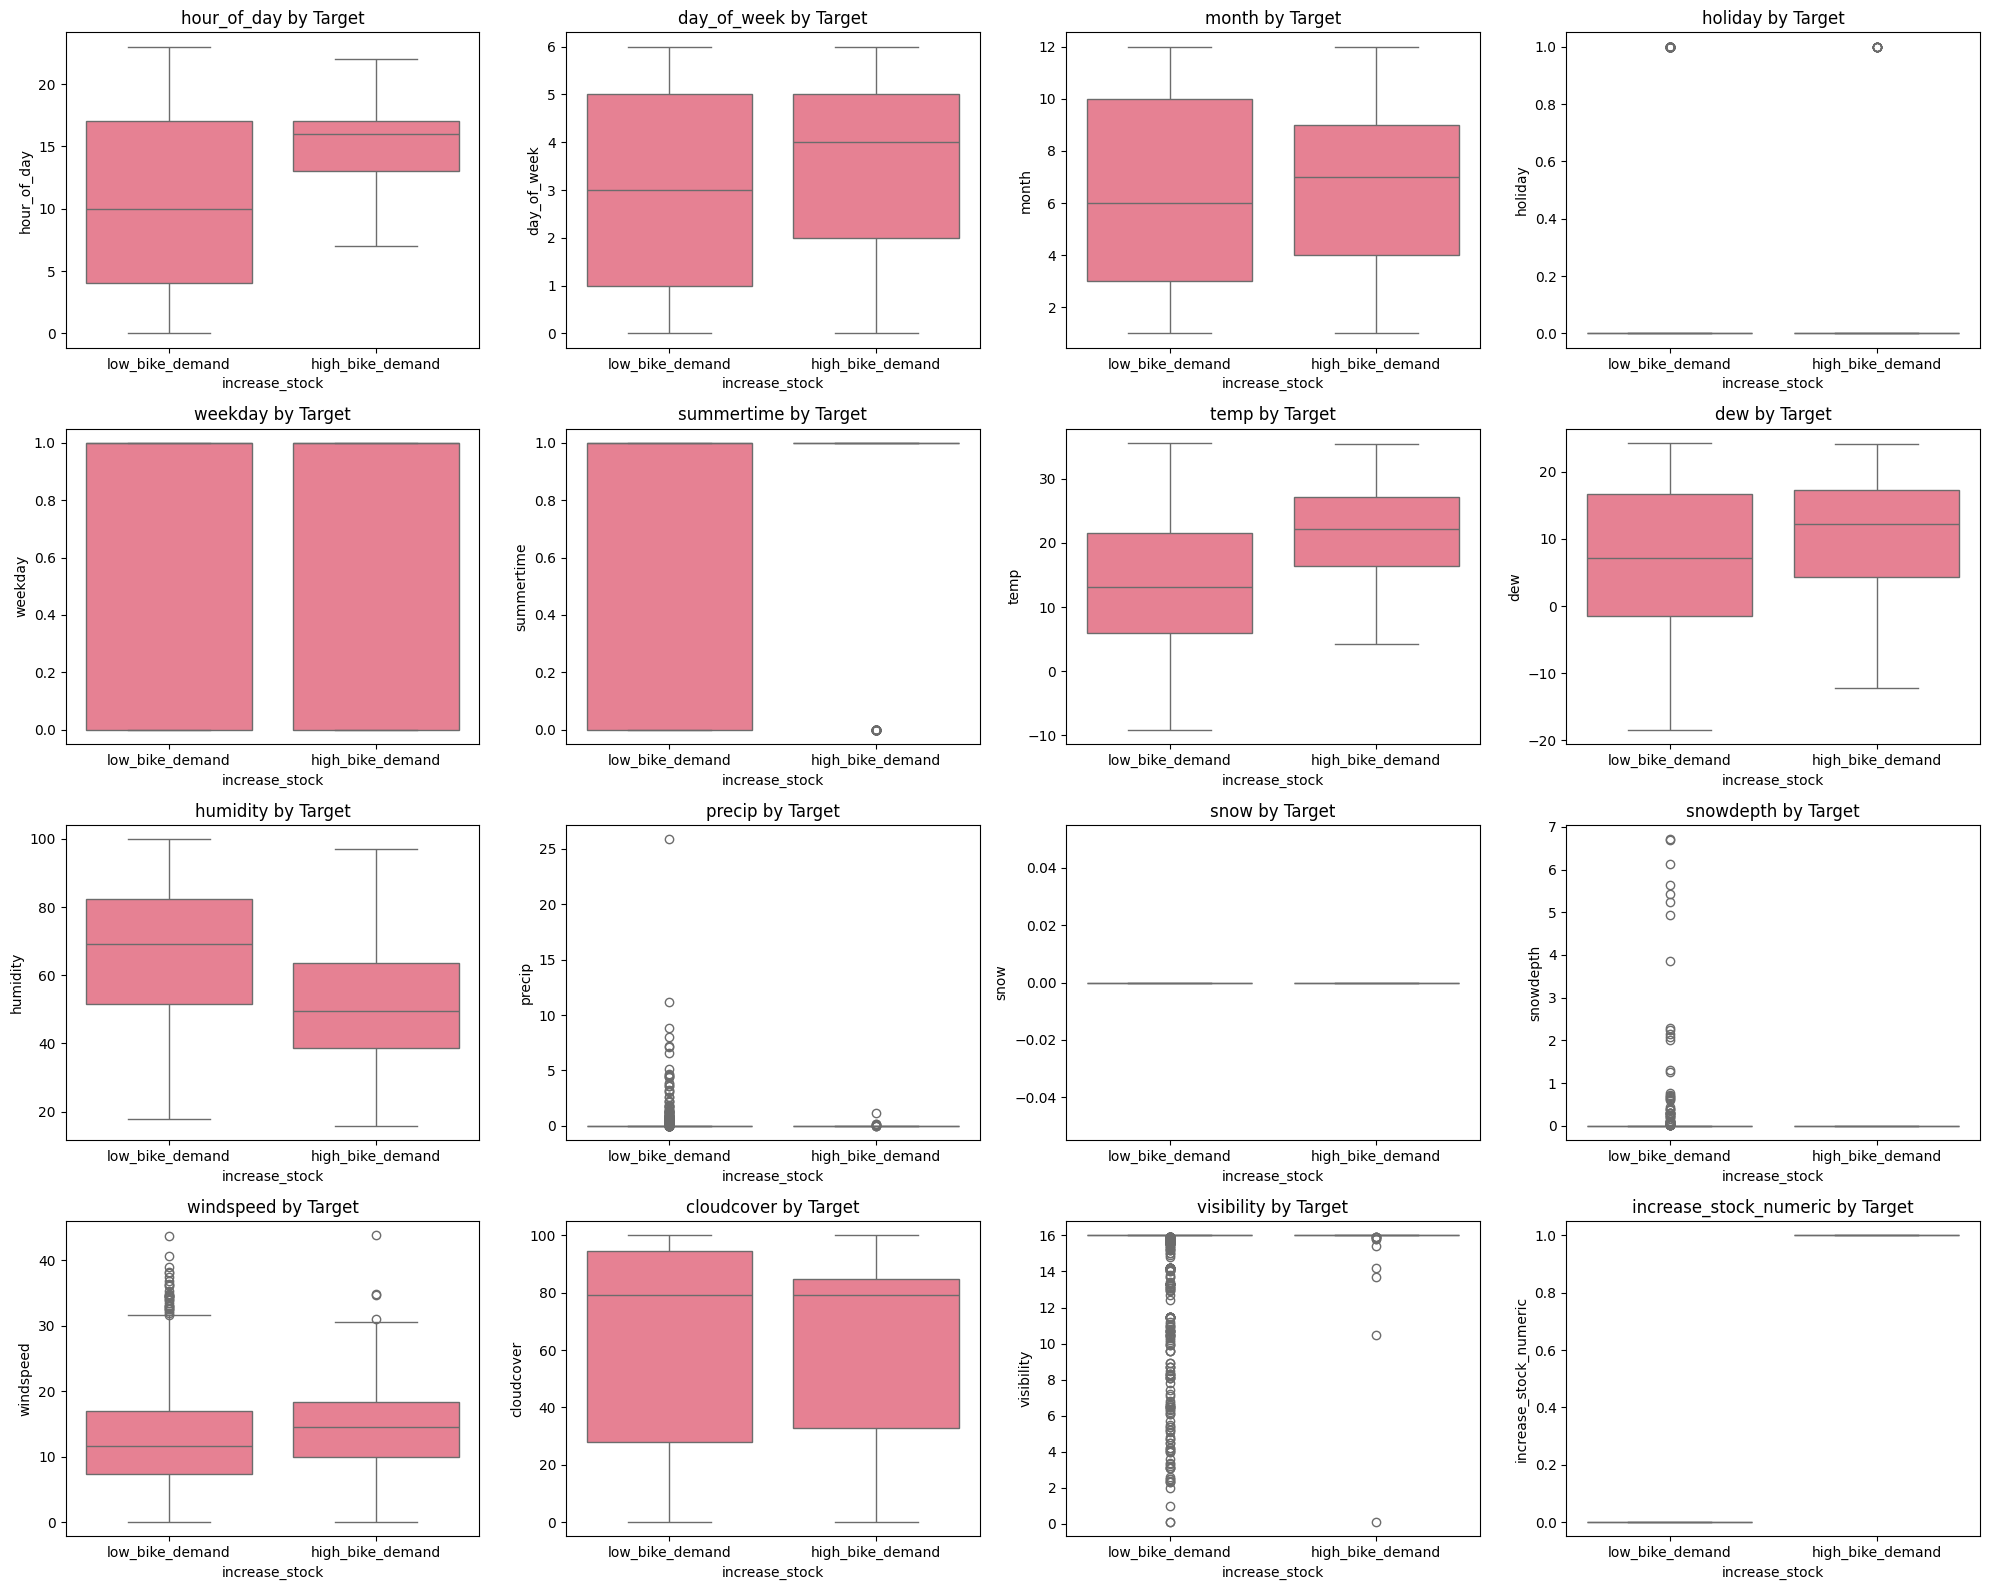

In [4]:
print("=== BASIC DATA INFO ===")
print(f"Dataset shape: {df.shape}")
print("\nData types:")
print(df.dtypes)
print("\nMissing values: none at all")
print("\nNumber of duplicate rows: none at all")
print("\n")

print("=== NUMERICAL FEATURES SUMMARY ===")
print(df.describe())

print("\n=== CATEGORICAL FEATURES SUMMARY ===")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Value counts:\n{df[col].value_counts().head()}")

print("=== TARGET VARIABLE ANALYSIS ===")
print(f"Target variable: increase_stock")
print(f"Value counts:\n{df['increase_stock'].value_counts()}")
print(f"Proportions:\n{df['increase_stock'].value_counts(normalize=True)}")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
n_cols = len(numerical_cols)
n_rows = (n_cols + 3) // 4  # 4 plots per row

fig, axes = plt.subplots(n_rows, 4, figsize=(20, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        df[col].hist(bins=30, ax=axes[i])
        axes[i].set_title(f'{col} Distribution')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

# Hide empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

print("=== CORRELATION ANALYSIS ===")
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# High correlations
print("\nHigh correlations (|r| > 0.8):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

for pair in high_corr_pairs:
    print(f"  {pair[0]} vs {pair[1]}: {pair[2]:.3f}")

print("=== FEATURE-TARGET RELATIONSHIPS ===")

# For numerical features vs target
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < len(axes) and col != 'increase_stock':
        sns.boxplot(data=df, x='increase_stock', y=col, ax=axes[i])
        axes[i].set_title(f'{col} by Target')

# Hide empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

